In [2]:
from utils import split_data

PATH = "./data/"
splitter = split_data(PATH + "raw.csv", PATH, test_size=0.1,
                          train_size=0.2)
x_train, y_train, x_test, y_test = splitter.split()

/home/paperspace/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from utils import translate

translater = translate()
x_train = translater.translate(x_train)
x_test = translater.translate(x_test)

In [4]:
from utils import standardize

y_train_std, y_test_std = standardize(y_train, y_test)

In [5]:
from modelArchitecture.ResnetRnnDense import ResnetRnnDense

In [6]:
from HydraMethod import HydraMethod

In [16]:
one_head_hydra = HydraMethod(ResnetRnnDense, 1);one_head_hydra.compile()

In [12]:
from utils import LRFinder

In [17]:
lr_finder = LRFinder(one_head_hydra.get_model())
lr_finder.find(one_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

Epoch 1/3
211913/211913 [==============================] - 56s 267us/step - loss: 0.6475
Epoch 2/3
211913/211913 [==============================] - 44s 209us/step - loss: 0.2252
Epoch 3/3
 49408/211913 [=====>........................] - ETA: 34s - loss: 0.3187

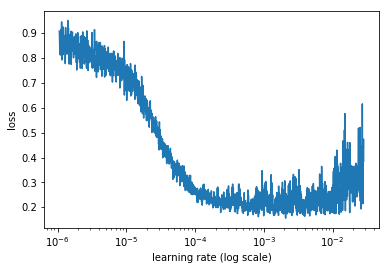

In [18]:
lr_finder.plot_loss()

In [19]:
one_head_hydra.compile(learning_rate=1e-3)
trained_one_head_hydra = one_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256)

Train on 211913 samples, validate on 107990 samples
Epoch 1/3
211913/211913 [==============================] - 58s 272us/step - loss: 0.1548 - val_loss: 0.3562
Epoch 2/3
211913/211913 [==============================] - 45s 211us/step - loss: 0.1330 - val_loss: 0.3344
Epoch 3/3
211913/211913 [==============================] - 45s 210us/step - loss: 0.1250 - val_loss: 0.3088


In [20]:
two_head_hydra = HydraMethod(ResnetRnnDense, 2);two_head_hydra.compile()

In [21]:
lr_finder = LRFinder(two_head_hydra.get_model())
lr_finder.find(two_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

Epoch 1/3
211913/211913 [==============================] - 98s 463us/step - loss: 0.6508
Epoch 2/3
211913/211913 [==============================] - 78s 370us/step - loss: 0.2196
Epoch 3/3
 82944/211913 [==========>...................] - ETA: 47s - loss: 0.2476

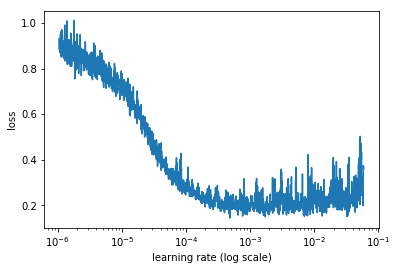

In [22]:
lr_finder.plot_loss()

In [23]:
two_head_hydra.compile(learning_rate=1e-3)
trained_two_head_hydra = two_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256)

Train on 211913 samples, validate on 107990 samples
Epoch 1/3
211913/211913 [==============================] - 104s 490us/step - loss: 0.1432 - val_loss: 0.3183
Epoch 2/3
211913/211913 [==============================] - 81s 384us/step - loss: 0.1211 - val_loss: 0.2778
Epoch 3/3
211913/211913 [==============================] - 81s 385us/step - loss: 0.1125 - val_loss: 0.2465


In [16]:
three_head_hydra = HydraMethod(ResnetRnnDense, 3);three_head_hydra.compile()

In [17]:
lr_finder = LRFinder(three_head_hydra.get_model())
lr_finder.find(three_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

Epoch 1/3
214720/214720 [==============================] - 129s 599us/step - loss: 0.6490
Epoch 2/3
214720/214720 [==============================] - 106s 494us/step - loss: 0.2097
Epoch 3/3
 73728/214720 [=========>....................] - ETA: 1:09 - loss: 0.2634

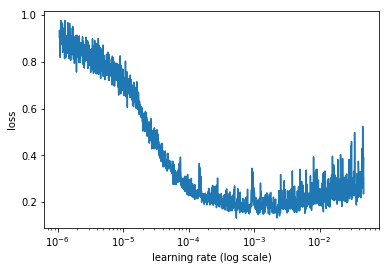

In [18]:
lr_finder.plot_loss()

In [19]:
three_head_hydra.compile(learning_rate=1e-4)
trained_three_head_hydra = three_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256)

Train on 214720 samples, validate on 106586 samples
Epoch 1/3
214720/214720 [==============================] - 140s 651us/step - loss: 0.1914 - val_loss: 0.3102
Epoch 2/3
214720/214720 [==============================] - 113s 527us/step - loss: 0.1495 - val_loss: 0.2650
Epoch 3/3
214720/214720 [==============================] - 113s 525us/step - loss: 0.1255 - val_loss: 0.2107


In [10]:
four_head_hydra = HydraMethod(ResnetRnnDense, 4);four_head_hydra.compile()

In [13]:
lr_finder = LRFinder(four_head_hydra.get_model())
lr_finder.find(four_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

Epoch 1/3
211913/211913 [==============================] - 163s 771us/step - loss: 0.6105
Epoch 2/3
211913/211913 [==============================] - 135s 636us/step - loss: 0.2078
Epoch 3/3
 86784/211913 [===========>..................] - ETA: 1:19 - loss: 0.2630

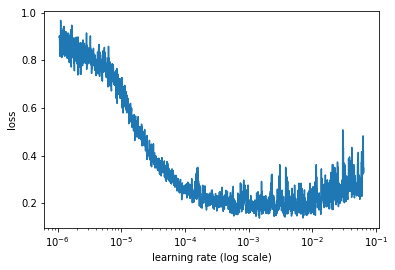

In [14]:
lr_finder.plot_loss()

In [15]:
four_head_hydra.compile(learning_rate=1e-3)
trained_four_head_hydra = four_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256)

Train on 211913 samples, validate on 107990 samples
Epoch 1/3
211913/211913 [==============================] - 178s 842us/step - loss: 0.1509 - val_loss: 0.3210
Epoch 2/3
211913/211913 [==============================] - 145s 686us/step - loss: 0.1236 - val_loss: 0.2768
Epoch 3/3
211913/211913 [==============================] - 145s 685us/step - loss: 0.1119 - val_loss: 0.2458
